# ***Transfer Learning***

---

---





In [1]:
!pip install keras
!pip install tensorflow

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


# ***Import Libraries***

---

---





In [25]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Flatten, Dense
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing import image
from keras.models import load_model

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

import warnings
warnings.filterwarnings('ignore')

# **Load the pretrained Network**

In [26]:
model_vgg16_conv = VGG19(weights='imagenet', include_top=False)

# ***Freeze the layers***

---

---





In [27]:
for layer in model_vgg16_conv.layers:
    layer.trainable = False

# ***Training parameters***

---

---





In [40]:
img_width, img_height = 200,200
train_data_dir = 'train'
val_data_dir = 'test'
model_weights_file = 'main_Model.h5'
nb_epochs = 10

# ***Build a classification model on top of Base Network***

---

---





In [41]:
input = Input(shape=(img_width, img_height, 3))
output_vgg16_conv = model_vgg16_conv(input)
x = Flatten()(output_vgg16_conv)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(26, activation='softmax')(x)
model = Model(inputs=input, outputs=x)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_12 (Dense)            (None, 64)                1179712   
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dense_14 (Dense)            (None, 256)               33024     
                                                                 
 dense_15 (Dense)            (None, 26)                6682

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# ***Dataset Preparation***

---

---





In [56]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=10, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height), 
                                                        batch_size=1,class_mode='categorical')

Found 780 images belonging to 26 classes.
Found 780 images belonging to 26 classes.


# ***Training***

---

---





In [57]:
callbacks = keras.callbacks.ModelCheckpoint("main_Model.h5",save_best_only=True)
history = model.fit_generator( train_generator, callbacks = callbacks, epochs=nb_epochs, validation_data=validation_generator)

print('Training Completed!')

Epoch 1/10
78/78 [==============================] - 109s 1s/step - loss: 2.1462 - accuracy: 0.2731 - val_loss: 1.6679 - val_accuracy: 0.4436
Epoch 2/10
78/78 [==============================] - 111s 1s/step - loss: 1.7611 - accuracy: 0.3833 - val_loss: 1.2884 - val_accuracy: 0.5359
Epoch 3/10
78/78 [==============================] - 117s 2s/step - loss: 1.3474 - accuracy: 0.4987 - val_loss: 0.9387 - val_accuracy: 0.6679
Epoch 4/10
78/78 [==============================] - 114s 1s/step - loss: 1.1078 - accuracy: 0.5923 - val_loss: 0.7352 - val_accuracy: 0.7128
Epoch 5/10
78/78 [==============================] - 113s 1s/step - loss: 0.8197 - accuracy: 0.7077 - val_loss: 0.8017 - val_accuracy: 0.7026
Epoch 6/10
78/78 [==============================] - 115s 1s/step - loss: 0.6606 - accuracy: 0.7859 - val_loss: 0.3492 - val_accuracy: 0.8615
Epoch 7/10
78/78 [==============================] - 112s 1s/step - loss: 0.5064 - accuracy: 0.8218 - val_loss: 0.3467 - val_accuracy: 0.8551
Epoch 8/10
78

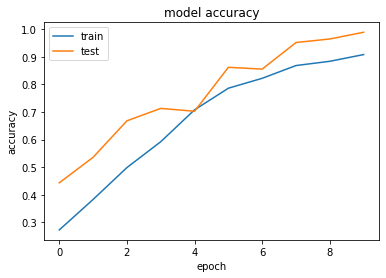

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

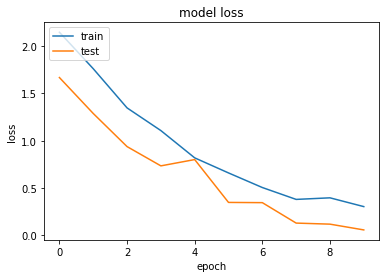

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ***Test the model***

---

---





Predicted Array: [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Predicted Label: A


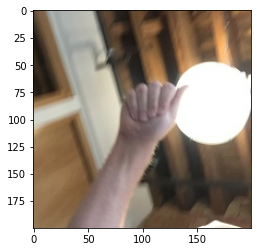

In [66]:
img_path = 'test/A/A0019_test.jpg'
label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])
imgplot = plt.imshow(img)
plt.show()

# ***Saved Model Deployment***

---

---





In [2]:
model = load_model('./main_Model.h5')
model.summary()

NameError: name 'load_model' is not defined

In [1]:
img_path = "D:/miniProject/try1/Dataset/train/I/I0013.jpg"
label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])
imgplot = plt.imshow(img)
plt.show()
#  'A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'

NameError: name 'image' is not defined

# ***Models for image classification with weights trained on ImageNet***
# ***Xception***
# ***VGG16***
# ***VGG19***
# ***ResNet50***
# ***InceptionV3***
# ***InceptionResNetV2***
# ***MobileNet***
# ***DenseNet***
# ***NASNet ***

---

---



